In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import defaultdict



from sklearn.metrics import confusion_matrix,classification_report,accuracy_score, roc_auc_score, roc_curve


In [6]:
dfk = pd.read_csv(r'BackEnd\kidney\input\train\kidney.csv')
dfk.shape

(400, 26)

In [3]:
dfk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [4]:
dfk.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [7]:
# dropping id column
dfk.drop('id', axis = 1, inplace = True)

In [8]:
dfk.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [9]:
dfk.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [10]:
dfk.red_blood_cells.unique()

array([nan, 'normal', 'abnormal'], dtype=object)

In [11]:
dfk.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
dfk.age.isnull().sum()

In [ ]:
dfk.age.dtype

In [ ]:
dfk.age.info()

In [ ]:
dfk.info()

In [ ]:
dfk.shape[0]

In [12]:
def column_format_validation(dfk):
    
    numeric_column  = [col for col in dfk.columns if dfk[col].dtype != 'object']
    category_column = [col for col in dfk.columns if dfk[col].dtype == 'object']
    
    print('Out of {total_col} columns {num_col} \
    columns are numeric and {cat_col} columns are Object'.format(\
                                                                 total_col=dfk.shape[1],\
                                                                 num_col =len(numeric_column),\
                                                                 cat_col =len(category_column)))
    print('List of numeric columns ')
    print('-'*30)
    for col in numeric_column:
          print(col)
    print('-'*30)

    
    print('Numeric df \n',dfk[numeric_column].head())
    
    print('List of Category columns ')
    print('-'*30)

    for col in category_column:
          print(col)
    print('-'*30)

    print('Category df \n:',dfk[category_column].head())
    
    return numeric_column, category_column


In [13]:
print('There are {col} columns and {row} rows present in the kidney data set'.format(col=dfk.shape[1],row=dfk.shape[0]))


There are 25 columns and 400 rows present in the kidney data set


In [14]:
numeric_column, category_column = column_format_validation(dfk)

Out of 25 columns 11     columns are numeric and 14 columns are Object
List of numeric columns 
------------------------------
age
blood_pressure
specific_gravity
albumin
sugar
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
------------------------------
Numeric df 
     age  blood_pressure  specific_gravity  albumin  sugar  \
0  48.0            80.0             1.020      1.0    0.0   
1   7.0            50.0             1.020      4.0    0.0   
2  62.0            80.0             1.010      2.0    3.0   
3  48.0            70.0             1.005      4.0    0.0   
4  51.0            80.0             1.010      2.0    0.0   

   blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  \
0                 121.0        36.0               1.2     NaN        NaN   
1                   NaN        18.0               0.8     NaN        NaN   
2                 423.0        53.0               1.8     NaN        NaN   
3                 117.0       

In [15]:
# converting necessary columns to numerical type

dfk['packed_cell_volume']     = pd.to_numeric(dfk['packed_cell_volume'], errors='coerce')
dfk['white_blood_cell_count'] = pd.to_numeric(dfk['white_blood_cell_count'], errors='coerce')
dfk['red_blood_cell_count']   = pd.to_numeric(dfk['red_blood_cell_count'], errors='coerce')

In [16]:
print('After data format correction and conversion')
numeric_column, category_column = column_format_validation(dfk)

After data format correction and conversion
Out of 25 columns 14     columns are numeric and 11 columns are Object
List of numeric columns 
------------------------------
age
blood_pressure
specific_gravity
albumin
sugar
blood_glucose_random
blood_urea
serum_creatinine
sodium
potassium
haemoglobin
packed_cell_volume
white_blood_cell_count
red_blood_cell_count
------------------------------
Numeric df 
     age  blood_pressure  specific_gravity  albumin  sugar  \
0  48.0            80.0             1.020      1.0    0.0   
1   7.0            50.0             1.020      4.0    0.0   
2  62.0            80.0             1.010      2.0    3.0   
3  48.0            70.0             1.005      4.0    0.0   
4  51.0            80.0             1.010      2.0    0.0   

   blood_glucose_random  blood_urea  serum_creatinine  sodium  potassium  \
0                 121.0        36.0               1.2     NaN        NaN   
1                   NaN        18.0               0.8     NaN        NaN   

In [14]:
dfk['red_blood_cells'].value_counts()

normal      201
abnormal     47
Name: red_blood_cells, dtype: int64

In [17]:
def Column_Unique_Values(dfk):
    for count, col in enumerate(category_column):
        print(f"{count+1}) {col} has {dfk[col].unique()} values\n")


# looking at unique values in categorical columns
print('Before unique value correction')

Column_Unique_Values(dfk)

Before unique value correction
1) red_blood_cells has [nan 'normal' 'abnormal'] values

2) pus_cell has ['normal' 'abnormal' nan] values

3) pus_cell_clumps has ['notpresent' 'present' nan] values

4) bacteria has ['notpresent' 'present' nan] values

5) hypertension has ['yes' 'no' nan] values

6) diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

7) coronary_artery_disease has ['no' 'yes' '\tno' nan] values

8) appetite has ['good' 'poor' nan] values

9) peda_edema has ['no' 'yes' nan] values

10) aanemia has ['no' 'yes' nan] values

11) class has ['ckd' 'ckd\t' 'notckd'] values



In [18]:
# replace incorrect values

dfk['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dfk['coronary_artery_disease'] = dfk['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

dfk['class'] = dfk['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [19]:
print('After unique value correction')
Column_Unique_Values(dfk)

After unique value correction
1) red_blood_cells has [nan 'normal' 'abnormal'] values

2) pus_cell has ['normal' 'abnormal' nan] values

3) pus_cell_clumps has ['notpresent' 'present' nan] values

4) bacteria has ['notpresent' 'present' nan] values

5) hypertension has ['yes' 'no' nan] values

6) diabetes_mellitus has ['yes' 'no' nan] values

7) coronary_artery_disease has ['no' 'yes' nan] values

8) appetite has ['good' 'poor' nan] values

9) peda_edema has ['no' 'yes' nan] values

10) aanemia has ['no' 'yes' nan] values

11) class has ['ckd' 'not ckd'] values



In [20]:

dfk['class'] = dfk['class'].map({'ckd': 1, 'not ckd': 0})
dfk['class'] = pd.to_numeric(dfk['class'], errors='coerce')

In [21]:


cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {dfk[col].unique()} values\n")



diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [1 0] values



In [ ]:
# checking numerical features distribution

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [20]:
for count, column in enumerate(dfk.columns):
    print(count+1,column, ' -->',dfk[column].nunique(),'\n',dfk[column].unique())

1 age  --> 76 
 [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
2 blood_pressure  --> 10 
 [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
3 specific_gravity  --> 5 
 [1.02  1.01  1.005 1.015   nan 1.025]
4 albumin  --> 6 
 [ 1.  4.  2.  3.  0. nan  5.]
5 sugar  --> 6 
 [ 0.  3.  4.  1. nan  2.  5.]
6 red_blood_cells  --> 2 
 [nan 'normal' 'abnormal']
7 pus_cell  --> 2 
 ['normal' 'abnormal' nan]
8 pus_cell_clumps  --> 2 
 ['notpresent' 'present' nan]
9 bacteria  --> 2 
 ['notpresent' 'present' nan]
10 blood_glucose_random  --> 146 
 [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 12

In [ ]:
dfk['red_blood_cell_count'].unique()

In [ ]:
dfk['white_blood_cell_count'].unique()

In [ ]:
dfk['packed_cell_volume'].unique()

In [ ]:
dfk['packed_cell_volume'].unique()

In [ ]:
dfk['white_blood_cell_count'].unique()

In [ ]:
dfk.info()

#### Data Pre Processing

In [21]:
# checking for null values

dfk.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [22]:
dfk[numeric_column].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [23]:
dfk[category_column].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [22]:


# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = dfk[feature].dropna().sample(dfk[feature].isna().sum())
    random_sample.index = dfk[dfk[feature].isnull()].index
    dfk.loc[dfk[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = dfk[feature].mode()[0]
    dfk[feature] = dfk[feature].fillna(mode)



In [23]:
# filling num_cols null values using random sampling method

for col in numeric_column:
    random_value_imputation(col)


In [24]:
dfk[numeric_column].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

In [25]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in category_column:
    impute_mode(col)

In [26]:
dfk[category_column].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

###### All the missing values are handeled now, lets do ctaegorical features encding now


#### Feature Encoding

In [27]:
for col in category_column:
    print(f"{col} has {dfk[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [28]:
print('After unique value correction')
Column_Unique_Values(dfk)

After unique value correction
1) red_blood_cells has ['normal' 'abnormal'] values

2) pus_cell has ['normal' 'abnormal'] values

3) pus_cell_clumps has ['notpresent' 'present'] values

4) bacteria has ['notpresent' 'present'] values

5) hypertension has ['yes' 'no'] values

6) diabetes_mellitus has ['yes' 'no'] values

7) coronary_artery_disease has ['no' 'yes'] values

8) appetite has ['good' 'poor'] values

9) peda_edema has ['no' 'yes'] values

10) aanemia has ['no' 'yes'] values

11) class has [1 0] values



In [51]:
# sns.pairplot(dfk)

##### As all of the categorical columns have 2 categories we can use label encoder


In [29]:


#As all of the categorical columns have 2 categories we can use label encoder


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in category_column:
    dfk[col] = le.fit_transform(dfk[col])



In [30]:
dfk.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,90.0,...,38.0,6000.0,2.9,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,5.2,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


#### Model Building

In [31]:
ind_col = [col for col in dfk.columns if col != 'class']
dep_col = 'class'

X = dfk[ind_col]
y = dfk[dep_col]

In [32]:
# splitting data intp training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [33]:
def metrics(X_train,y_train,X_test,y_true,model,model_name):
    # accuracy score, confusion matrix and classification report of knn
    y_pred         = model.predict(X_test)
    test_accuracy  = accuracy_score(y_true,  y_pred).round(4)*100
    train_accuracy = accuracy_score(y_train, model.predict(X_train)).round(4)*100
    
    roc_auc        = roc_auc_score(y_true,y_pred).round(3)

    print(f"Train Accuracy of {model_name} is {train_accuracy}")
    print(f"Test Accuracy of {model_name} is {test_accuracy} \n")

    print('-'*30)
    print(f"Confusion Matrix :- \n{confusion_matrix( y_true, y_pred )}\n")
    print('-'*30)
    print(f"Classification Report :- \n {classification_report( y_true, y_pred )}")
    print('-'*30)
    print(f'roc_auc_score is {roc_auc}')
    
    fpr, tpr, thresholds = roc_curve(y_true, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name}(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC')
    plt.show()  

In [35]:
def metrics(X_train,y_train,X_test,y_true,model,model_name,compare_df):
    # accuracy score, confusion matrix and classification report of knn
    y_pred         = model.predict(X_test)
    test_accuracy  = accuracy_score(y_true,  y_pred).round(4)*100
    train_accuracy = accuracy_score(y_train, model.predict(X_train)).round(4)*100
    
    roc_auc        = roc_auc_score(y_true,y_pred).round(3)

    cm    = confusion_matrix( y_true, y_pred )
    df_cm = pd.DataFrame(cm,index=['Actual No','Actual Yes'],columns=['Predicted No','Predicted Yes'])
    
    
    class_report = classification_report( y_test, y_pred, output_dict = True )
    precision    = class_report['weighted avg']['precision']
    recall       = class_report['weighted avg']['recall']
    f1_score     = class_report['weighted avg']['f1-score']
    accuracy     = class_report['accuracy']
    
    if len(compare_df) == 0 :
        compare_df = pd.DataFrame(columns = ['Accuracy','Train Accuracy','Test Accuracy','Precision','Recall','f1-score','roc_auc_score'])
    
    compare_df.loc[model_name] = [accuracy,train_accuracy,test_accuracy,precision,recall,f1_score,roc_auc]
    print(f"Train Accuracy of {model_name} is {train_accuracy}")
    print(f"Test Accuracy of {model_name} is {test_accuracy} \n")

    print('-'*30)
#     df_cm
    print(f"Confusion Matrix :- \n{df_cm}\n")
    print('-'*30)
    print(f"Classification Report :- \n {classification_report( y_true, y_pred )}")
    print('-'*30)
    print(f'roc_auc_score is {roc_auc}')
    fpr, tpr, thresholds = roc_curve(y_true, model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name}(area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig(f'{model_name}_ROC')
    plt.show()
    
    return compare_df

Train Accuracy of Logistic Regression is 88.92999999999999
Test Accuracy of Logistic Regression is 90.0 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             40              8
Actual Yes             4             68

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87        48
           1       0.89      0.94      0.92        72

    accuracy                           0.90       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.90      0.90       120

------------------------------
roc_auc_score is 0.889


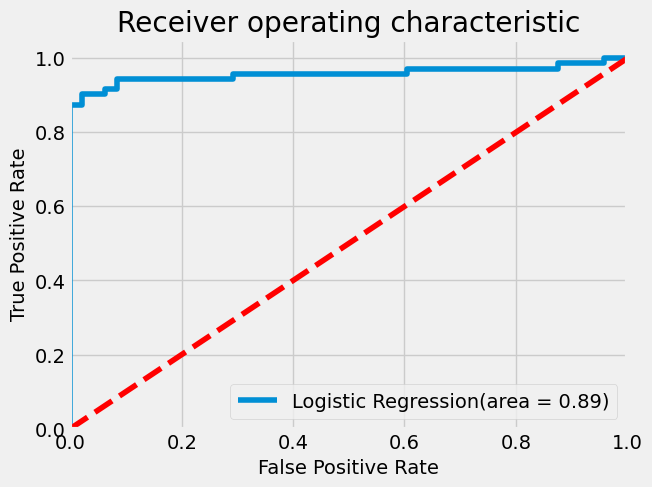

In [36]:
from sklearn.linear_model import LogisticRegression

model_name = 'Logistic Regression'

LogisticReg = LogisticRegression()
LogisticReg.fit(X_train, y_train)

# metrics(X_train,y_train,X_test,y_test,LogisticReg,model_name)
compare_df = pd.DataFrame()
compare_df = metrics(X_train,y_train,X_test,y_test,LogisticReg,model_name,compare_df)

Train Accuracy of Naive Bayes is 96.07
Test Accuracy of Naive Bayes is 94.17 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             44              4
Actual Yes             3             69

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.95      0.96      0.95        72

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120

------------------------------
roc_auc_score is 0.938


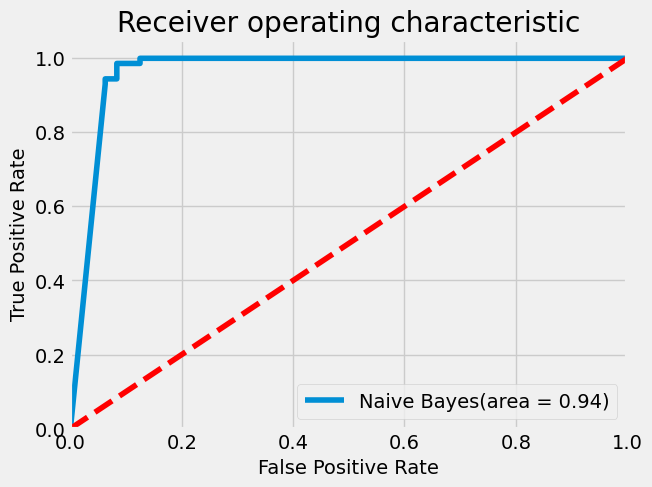

In [38]:
model_name = 'Naive Bayes'

NB = GaussianNB()
NB.fit(X_train,y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,NB,model_name,compare_df)

Train Accuracy of SVC -linear is 97.5
Test Accuracy of SVC -linear is 95.83 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             44              4
Actual Yes             1             71

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.92      0.95        48
           1       0.95      0.99      0.97        72

    accuracy                           0.96       120
   macro avg       0.96      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120

------------------------------
roc_auc_score is 0.951


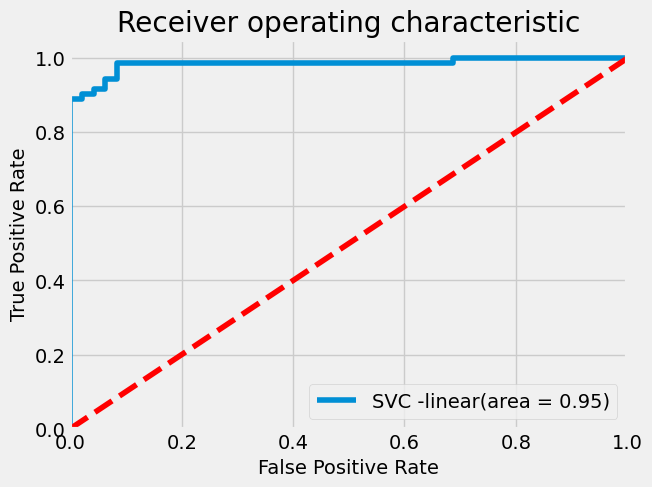

Train Accuracy of SVC -poly is 63.57000000000001
Test Accuracy of SVC -poly is 60.0 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No              0             48
Actual Yes             0             72

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.60      1.00      0.75        72

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120

------------------------------
roc_auc_score is 0.5


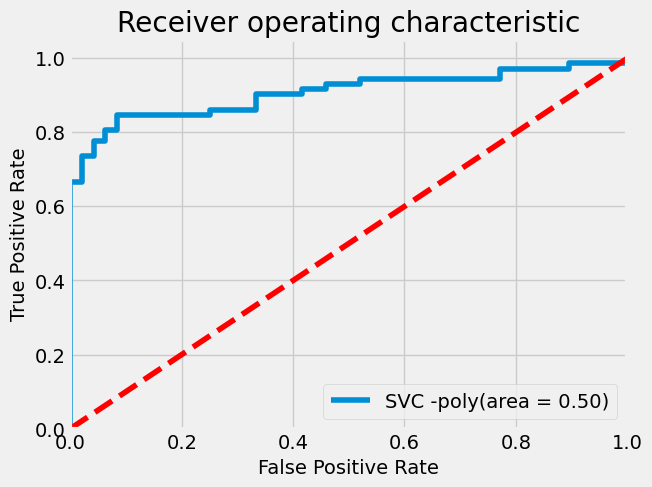

Train Accuracy of SVC -rbf is 63.57000000000001
Test Accuracy of SVC -rbf is 60.0 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No              0             48
Actual Yes             0             72

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.60      1.00      0.75        72

    accuracy                           0.60       120
   macro avg       0.30      0.50      0.37       120
weighted avg       0.36      0.60      0.45       120

------------------------------
roc_auc_score is 0.5


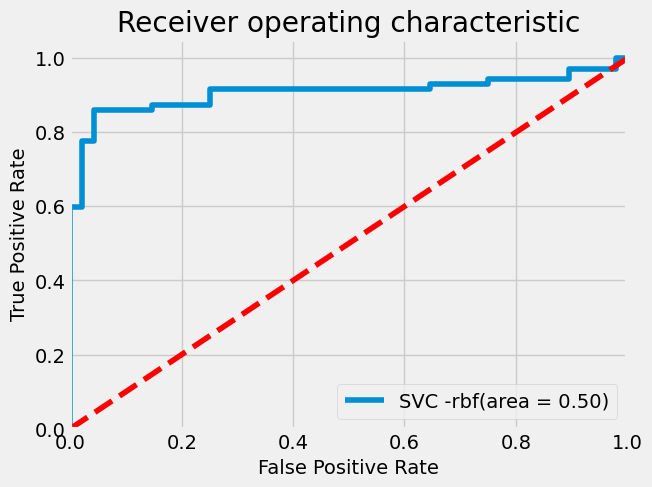

Train Accuracy of SVC -sigmoid is 49.64
Test Accuracy of SVC -sigmoid is 35.83 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No              6             42
Actual Yes            35             37

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.15      0.12      0.13        48
           1       0.47      0.51      0.49        72

    accuracy                           0.36       120
   macro avg       0.31      0.32      0.31       120
weighted avg       0.34      0.36      0.35       120

------------------------------
roc_auc_score is 0.319


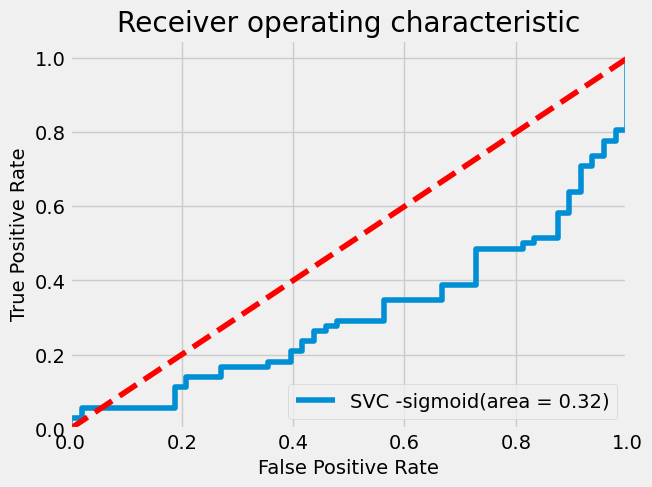

In [39]:
model_name = 'SVC -'
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc = SVC(kernel = kernels[i], probability=True)
    svc.fit(X_train, y_train)
    svc_scores.append(svc.score(X_test, y_test))
    compare_df = metrics(X_train,y_train,X_test,y_test,svc,model_name+kernels[i],compare_df)# svc = SVC(probability = True)
# svc.fit(X_train,y_train)

#### KNN

Train Accuracy of KNN is 79.29
Test Accuracy of KNN is 63.33 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             24             24
Actual Yes            20             52

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.55      0.50      0.52        48
           1       0.68      0.72      0.70        72

    accuracy                           0.63       120
   macro avg       0.61      0.61      0.61       120
weighted avg       0.63      0.63      0.63       120

------------------------------
roc_auc_score is 0.611


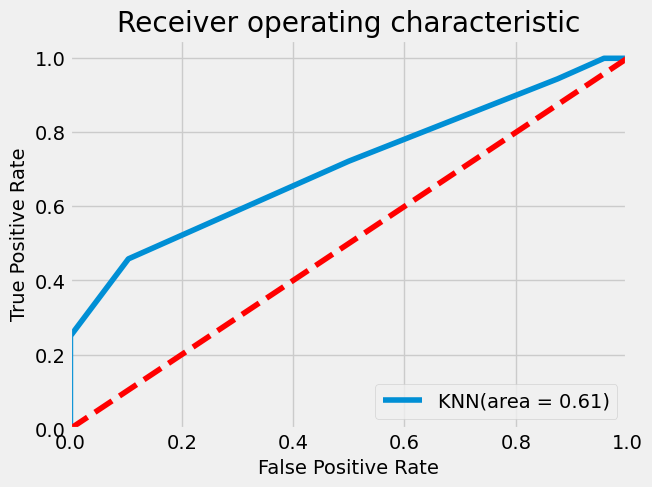

In [41]:
model_name = 'KNN'

knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,knn,model_name,compare_df)

Train Accuracy of Neural Network is 87.5
Test Accuracy of Neural Network is 87.5 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             37             11
Actual Yes             4             68

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      0.77      0.83        48
           1       0.86      0.94      0.90        72

    accuracy                           0.88       120
   macro avg       0.88      0.86      0.87       120
weighted avg       0.88      0.88      0.87       120

------------------------------
roc_auc_score is 0.858


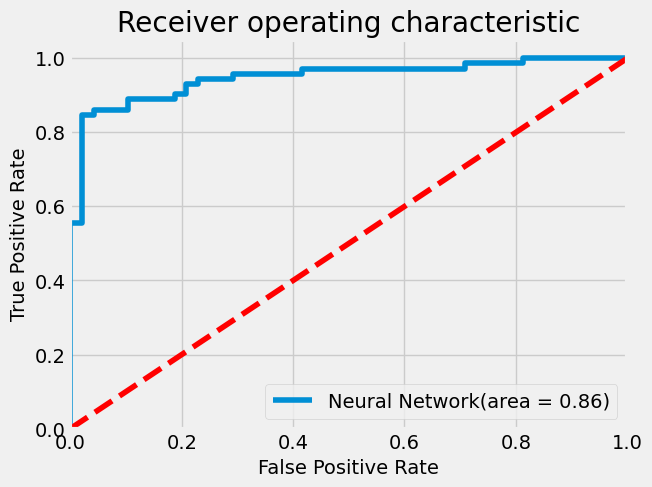

In [43]:
model_name = 'Neural Network'

NN = MLPClassifier(hidden_layer_sizes=(100,100,100),activation='logistic',solver='adam',max_iter=500)
# NN = MLPClassifier()

NN.fit(X_train, y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,NN,model_name,compare_df)

#### Decision Tree Classifier

Train Accuracy of Decision Tree is 100.0
Test Accuracy of Decision Tree is 95.83 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             43              5
Actual Yes             0             72

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95        48
           1       0.94      1.00      0.97        72

    accuracy                           0.96       120
   macro avg       0.97      0.95      0.96       120
weighted avg       0.96      0.96      0.96       120

------------------------------
roc_auc_score is 0.948


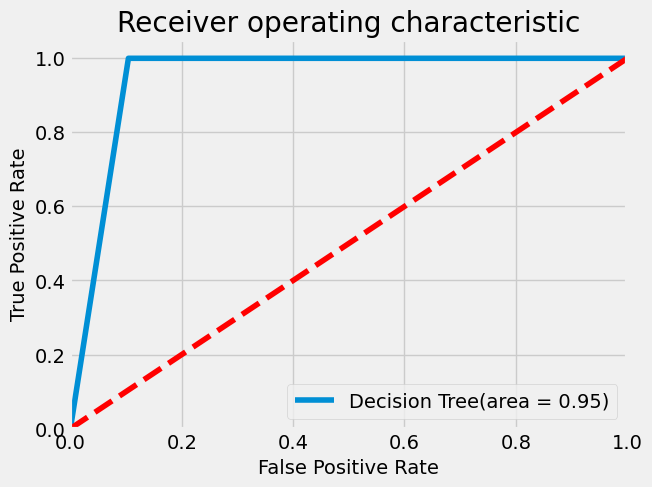

In [45]:
model_name = 'Decision Tree'

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

compare_df = metrics(X_train,y_train,X_test,y_test,dtc,model_name,compare_df)

In [46]:
# hyper parameter tuning of decision tree 

from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [47]:


# best parameters and best score

print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)



{'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
0.9892857142857142


Train Accuracy of DecisionTree best is 99.64
Test Accuracy of DecisionTree best is 93.33 

------------------------------
Confusion Matrix :- 
            Predicted No  Predicted Yes
Actual No             41              7
Actual Yes             1             71

------------------------------
Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.85      0.91        48
           1       0.91      0.99      0.95        72

    accuracy                           0.93       120
   macro avg       0.94      0.92      0.93       120
weighted avg       0.94      0.93      0.93       120

------------------------------
roc_auc_score is 0.92


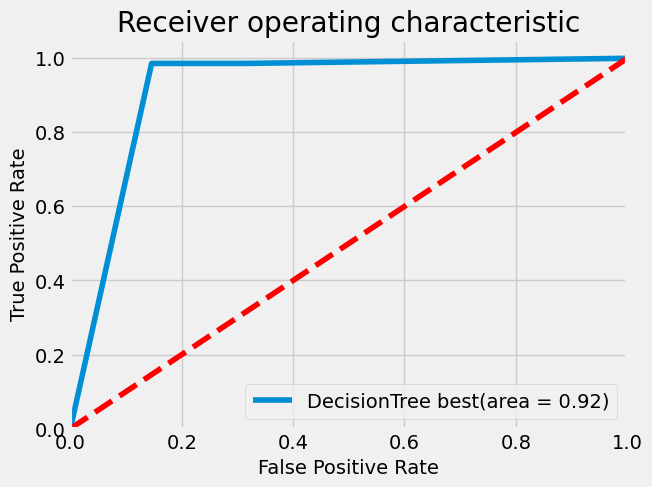

In [48]:
model_name = 'DecisionTree best'
dtc = grid_search_dtc.best_estimator_

compare_df = metrics(X_train,y_train,X_test,y_test,dtc,model_name,compare_df)

In [49]:
compare_df

,Accuracy,Train Accuracy,Test Accuracy,Precision,Recall,f1-score,roc_auc_score
Logistic Regression,0.900000,88.93,90.00,0.900478,0.900000,0.899177,0.889
Naive Bayes,0.941667,96.07,94.17,0.941591,0.941667,0.941561,0.938
SVC -linear,0.958333,97.50,95.83,0.959111,0.958333,0.958086,0.951
SVC -poly,0.600000,63.57,60.00,0.360000,0.600000,0.450000,0.500
SVC -rbf,0.600000,63.57,60.00,0.360000,0.600000,0.450000,0.500
SVC -sigmoid,0.358333,49.64,35.83,0.339549,0.358333,0.347972,0.319
KNN,0.633333,79.29,63.33,0.628708,0.633333,0.630317,0.611
Neural Network,0.875000,87.50,87.50,0.877431,0.875000,0.872982,0.858
Decision Tree,0.958333,100.00,95.83,0.961039,0.958333,0.957888,0.948
DecisionTree best,0.933333,99.64,93.33,0.936630,0.933333,0.932444,0.920


In [117]:
import joblib
filename ='decision_tree_model.pkl'
joblib.dump(dtc,filename)

['decision_tree_model.pkl']

In [122]:
import sklearn
sklearn.__version__

'1.2.1'

In [120]:
import pickle
with open('decision_tree.pkl', 'wb') as f:
    pickle.dump(dtc, f)

In [118]:
import joblib

dt_model = joblib.load('decision_tree_model.pkl')

In [ ]:
dt_model.predict

In [38]:
# best estimator

dtc = grid_search_dtc.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 0.9785714285714285
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 
[[43  5]
 [ 1 71]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.98      0.90      0.93        48
           1       0.93      0.99      0.96        72

    accuracy                           0.95       120
   macro avg       0.96      0.94      0.95       120
weighted avg       0.95      0.95      0.95       120

